In [1]:
import pickle

In [3]:
# Importing ndarray dictionaries from pickel file
file_path = "../data/mel_spectrogram_fixed_dim.pickle"
with open (file_path, 'rb') as f:
    data = pickle.load(f)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
# Flatten the arrays to feed to SVM model
# true data has 286 list elements and each elememt is a numpy ndarray of size (128,41)
X = [vec.flatten() for num, num_vec in data.items() for vec in num_vec]
y = np.array([num for num, num_vec in data.items() for vec in num_vec], dtype = np.float32)

In [6]:
# Split data into training, testing and validating sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
# X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.25, random_state=5)

In [7]:
print(np.unique(np.array(y_train)))
print(np.unique(np.array(y_test)))
# print(np.unique(np.array(y_valid)))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [12]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf  = make_pipeline(StandardScaler(),SVC(kernel='rbf', C=60, gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=60, gamma='auto'))])

0.3194444444444444


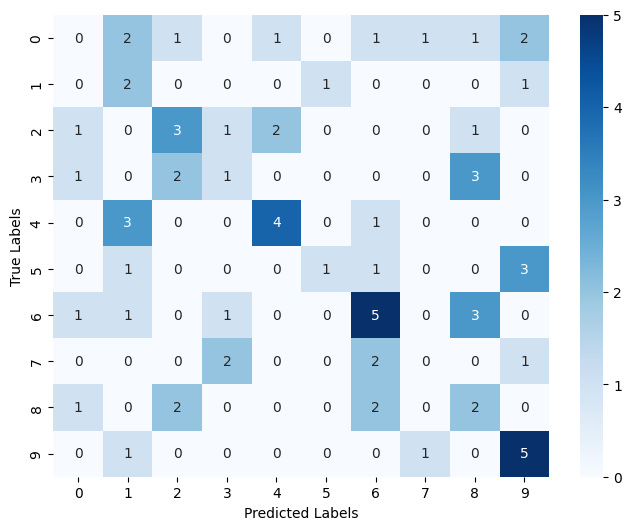

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.20      0.50      0.29         4
           2       0.38      0.38      0.38         8
           3       0.20      0.14      0.17         7
           4       0.57      0.50      0.53         8
           5       0.50      0.17      0.25         6
           6       0.42      0.45      0.43        11
           7       0.00      0.00      0.00         5
           8       0.20      0.29      0.24         7
           9       0.42      0.71      0.53         7

    accuracy                           0.32        72
   macro avg       0.29      0.31      0.28        72
weighted avg       0.30      0.32      0.29        72



In [13]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
accuracy = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Create a classification report
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] # replace with your actual class names
print(classification_report(y_test, y_pred, target_names=target_names))